# Counterfactual analysis (thesis)

Date: 15 October 2025<br>
By: Eunhye Yang<br>
Description: Using prognosis model to perform coutnerfactual analysis on surgical samples

In [1]:
import joblib
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import confusion_matrix
from scipy.stats import mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt

model = joblib.load('model_thesis.pkl')
# ce_pairs_idx = pd.read_csv('match_CE.csv')
# evd_pairs_idx = pd.read_csv('match_EVD.csv')
surgery = pd.read_csv('preprocessing/final_preprocessed_surgery_thesis.csv')
surgery = surgery.drop(['@6MmRS', '@6Mmortality'], axis=1)

In [2]:
prefixes = [
    'AdmissionGCS',
    'Location0supratentorial1infratentorial',
    'EverIVH',
]
cols_to_drop = [col for col in surgery.columns if any(col.startswith(prefix) for prefix in prefixes)]
surgery = surgery.drop(columns=cols_to_drop, axis=1)

surgery_y = surgery['outcomes'].copy()
surgery_X = surgery.drop(['outcomes', 'TypeOfOT (1=clot evacuation, 2=EVD only)'], axis=1).copy()

In [3]:
ce_X = surgery.loc[surgery['TypeOfOT (1=clot evacuation, 2=EVD only)'] == 1].copy()
ce_X = ce_X.drop(['outcomes', 'TypeOfOT (1=clot evacuation, 2=EVD only)'], axis=1)
ce_y = surgery['outcomes'].loc[surgery['TypeOfOT (1=clot evacuation, 2=EVD only)'] == 1].copy()

evd_X = surgery.loc[surgery['TypeOfOT (1=clot evacuation, 2=EVD only)'] == 2].copy()
evd_X = evd_X.drop(['outcomes', 'TypeOfOT (1=clot evacuation, 2=EVD only)'], axis=1)
evd_y = surgery['outcomes'].loc[surgery['TypeOfOT (1=clot evacuation, 2=EVD only)'] == 2].copy()

## Predict outcomes

In [4]:
surgery_pred = model.predict(surgery_X)
ce_pred = model.predict(ce_X)
evd_pred = model.predict(evd_X)

## Outcome visualization

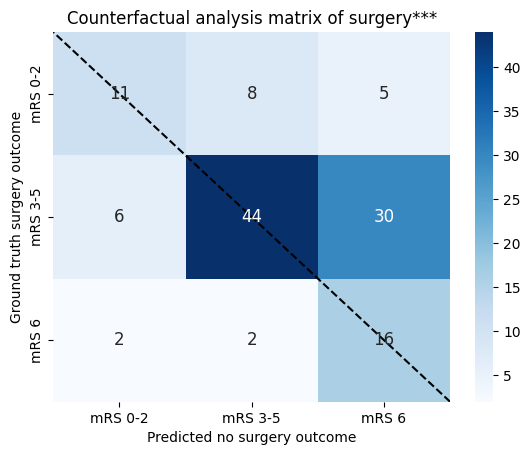

In [5]:
cm = confusion_matrix(surgery_y, surgery_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 12})
plt.title('Counterfactual analysis matrix of surgery***')
plt.xlabel('Predicted no surgery outcome')
plt.xticks([0.5,1.5,2.5], ['mRS 0-2', 'mRS 3-5', 'mRS 6'])
plt.ylabel('Ground truth surgery outcome')
plt.yticks([0.5,1.5,2.5], ['mRS 0-2', 'mRS 3-5', 'mRS 6'])
plt.plot([3, 0], [3, 0], 'k--')
plt.show()

In [6]:
mannwhitneyu(surgery_y, surgery_pred, alternative='less')

MannwhitneyuResult(statistic=np.float64(5878.0), pvalue=np.float64(0.00019144122116837388))

In [7]:
std = np.std(surgery_pred-surgery_y)
print('ATE: ', np.mean(surgery_pred-surgery_y))
print(f'(±{1.96*(std/np.sqrt(len(surgery_pred-surgery_y)))})')

ATE:  0.2903225806451613
(±0.12600467321138817)


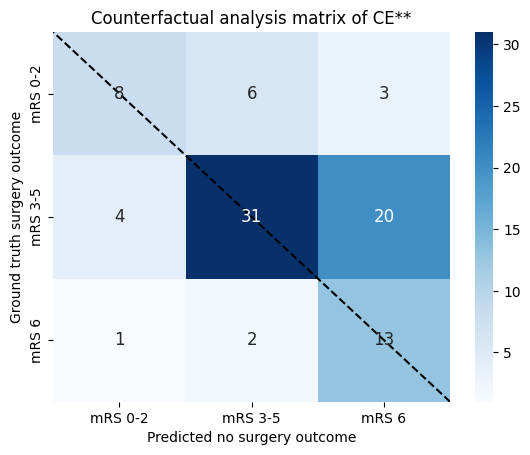

In [8]:
cm = confusion_matrix(ce_y, ce_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 12})
plt.title('Counterfactual analysis matrix of CE**')
plt.xlabel('Predicted no surgery outcome')
plt.xticks([0.5,1.5,2.5], ['mRS 0-2', 'mRS 3-5', 'mRS 6'])
plt.ylabel('Ground truth surgery outcome')
plt.yticks([0.5,1.5,2.5], ['mRS 0-2', 'mRS 3-5', 'mRS 6'])
plt.plot([3, 0], [3, 0], 'k--')
plt.show()

In [9]:
mannwhitneyu(ce_y, ce_pred, alternative='less')

MannwhitneyuResult(statistic=np.float64(3018.0), pvalue=np.float64(0.002602733494695995))

In [10]:
std = np.std(ce_pred-ce_y)
print('ATE: ', np.mean(ce_pred-ce_y))
print(f'(±{1.96*(std/np.sqrt(len(ce_pred-ce_y)))})')

ATE:  0.2727272727272727
(±0.14340340979696906)


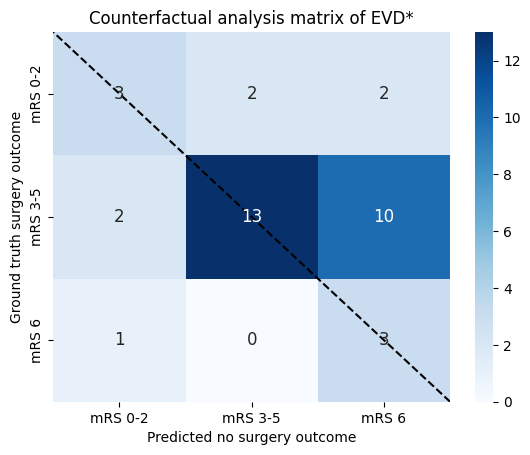

In [11]:
cm = confusion_matrix(evd_y, evd_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 12})
plt.title('Counterfactual analysis matrix of EVD*')
plt.xlabel('Predicted no surgery outcome')
plt.xticks([0.5,1.5,2.5], ['mRS 0-2', 'mRS 3-5', 'mRS 6'])
plt.ylabel('Ground truth surgery outcome')
plt.yticks([0.5,1.5,2.5], ['mRS 0-2', 'mRS 3-5', 'mRS 6'])
plt.plot([3, 0], [3, 0], 'k--')
plt.show()

In [12]:
mannwhitneyu(evd_y, evd_pred, alternative='less')

MannwhitneyuResult(statistic=np.float64(472.5), pvalue=np.float64(0.013993614146297252))

In [13]:
std = np.std(evd_pred-evd_y)
print('ATE: ', np.mean(evd_pred-evd_y))
print(f'(±{1.96*(std/np.sqrt(len(evd_pred-evd_y)))})')

ATE:  0.3333333333333333
(±0.2553670802570534)
